In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN
import warnings
warnings.filterwarnings(action='ignore') 
import random
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [5]:
# pip install tensorflow

## RNN1 / window size 96

In [1]:
# 전처리 모듈 import 후 train, test 데이터 프레임 불러오기

import DataProcessing

path = './'
train_df, test_df = DataProcessing.processing(path)

Welcome


In [10]:
# window_size 설정 후 시계열 데이터 생성

pre_day = 28 # (31 - pre_month) * 24 = windowsize /27 : 96//28 : 72//29 : 48//30 : 24//
x_train, y_train, x_test, y_test, submission_x, submission_y = DataProcessing.data_form_descision(train_df, test_df, pre_day)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, submission_x.shape, submission_y.shape)

(27367, 96, 1) (27367, 336) (7992, 96, 1) (7992, 336) (8425, 96, 1) (8425, 336)


In [11]:
# model 생성

initializer = tf.keras.initializers.GlorotNormal(seed=15)

model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(x_train[0].shape), 
               return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(32, activation='relu', kernel_initializer=initializer))
model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(Dense(32, activation='relu', kernel_initializer=initializer))
model.add(Dense(336, activation='linear', kernel_initializer=initializer))

optimizer = Adam(learning_rate=0.00004)
model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 96, 64)            4224      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 336)               11088     
                                                                 
Total params: 22,608
Trainable params: 22,608
Non-trainable params: 0
_________________________________________________________________


In [12]:
random_seed = 15
tf.keras.utils.set_random_seed(random_seed)
tf.config.experimental.enable_op_determinism()
np.random.seed(random_seed)
random.seed(random_seed)

file_path = './RNN1_best_model.h5'
checkpoint = ModelCheckpoint(file_path,
                            monitor = 'val_mae',
                            verbose=1,
                            save_best_only=True,
                            mode='auto')

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                 epochs=100, batch_size=16, callbacks=[checkpoint])

Epoch 1/100
1707/1711 [============================>.] - ETA: 0s - loss: 44.4663 - mae: 44.4663
Epoch 1: val_mae improved from inf to 35.68876, saving model to .\RNN1_best_model.h5
1711/1711 [==============================] - 20s 11ms/step - loss: 44.4461 - mae: 44.4461 - val_loss: 35.6888 - val_mae: 35.6888
Epoch 2/100
1707/1711 [============================>.] - ETA: 0s - loss: 34.1480 - mae: 34.1480
Epoch 2: val_mae improved from 35.68876 to 35.44551, saving model to .\RNN1_best_model.h5
1711/1711 [==============================] - 19s 11ms/step - loss: 34.1482 - mae: 34.1482 - val_loss: 35.4455 - val_mae: 35.4455
Epoch 3/100
1710/1711 [============================>.] - ETA: 0s - loss: 33.4653 - mae: 33.4653
Epoch 3: val_mae improved from 35.44551 to 33.91630, saving model to .\RNN1_best_model.h5
1711/1711 [==============================] - 19s 11ms/step - loss: 33.4649 - mae: 33.4649 - val_loss: 33.9163 - val_mae: 33.9163
Epoch 4/100
1710/1711 [============================>.] - ETA

Epoch 56/100
1710/1711 [============================>.] - ETA: 0s - loss: 21.8593 - mae: 21.8593
Epoch 56: val_mae did not improve from 22.53179
1711/1711 [==============================] - 19s 11ms/step - loss: 21.8594 - mae: 21.8594 - val_loss: 22.6363 - val_mae: 22.6363
Epoch 57/100
1711/1711 [==============================] - ETA: 0s - loss: 21.8501 - mae: 21.8501
Epoch 57: val_mae did not improve from 22.53179
1711/1711 [==============================] - 19s 11ms/step - loss: 21.8501 - mae: 21.8501 - val_loss: 22.5543 - val_mae: 22.5543
Epoch 58/100
1709/1711 [============================>.] - ETA: 0s - loss: 21.8498 - mae: 21.8498
Epoch 58: val_mae did not improve from 22.53179
1711/1711 [==============================] - 19s 11ms/step - loss: 21.8498 - mae: 21.8498 - val_loss: 22.5509 - val_mae: 22.5509
Epoch 59/100
1707/1711 [============================>.] - ETA: 0s - loss: 21.8421 - mae: 21.8421
Epoch 59: val_mae did not improve from 22.53179
1711/1711 [======================

Epoch 85/100
1707/1711 [============================>.] - ETA: 0s - loss: 21.6782 - mae: 21.6782
Epoch 85: val_mae did not improve from 22.44266
1711/1711 [==============================] - 19s 11ms/step - loss: 21.6779 - mae: 21.6779 - val_loss: 22.5597 - val_mae: 22.5597
Epoch 86/100
1709/1711 [============================>.] - ETA: 0s - loss: 21.6781 - mae: 21.6781
Epoch 86: val_mae improved from 22.44266 to 22.43375, saving model to .\RNN1_best_model.h5
1711/1711 [==============================] - 19s 11ms/step - loss: 21.6778 - mae: 21.6778 - val_loss: 22.4338 - val_mae: 22.4338
Epoch 87/100
1710/1711 [============================>.] - ETA: 0s - loss: 21.6724 - mae: 21.6724
Epoch 87: val_mae did not improve from 22.43375
1711/1711 [==============================] - 19s 11ms/step - loss: 21.6727 - mae: 21.6727 - val_loss: 22.6754 - val_mae: 22.6754
Epoch 88/100
1709/1711 [============================>.] - ETA: 0s - loss: 21.6710 - mae: 21.6710
Epoch 88: val_mae did not improve from

In [13]:
# model.save('model.h5')
RNN1_model = tf.keras.models.load_model('./RNN1_best_model.h5')
RNN1_model.evaluate(x_test, y_test)

250/250 [==============================] - 1s 3ms/step - loss: 22.3992 - mae: 22.3992


[22.39923858642578, 22.39923858642578]

In [14]:
RNN1_pred = RNN1_model.predict(submission_x)
pd.DataFrame(RNN1_pred).to_csv('RNN1_pred.csv')

264/264 [==============================] - 1s 3ms/step


## RNN2 / window size 96

In [15]:
pre_day = 28 # (31 - pre_month) * 24 = windowsize /27 : 96//28 : 72//29 : 48//30 : 24//
x_train, y_train, x_test, y_test, submission_x, submission_y = DataProcessing.data_form_descision(train_df, test_df, pre_day)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, submission_x.shape, submission_y.shape)

(27367, 96, 1) (27367, 336) (7992, 96, 1) (7992, 336) (8425, 96, 1) (8425, 336)


In [16]:
# model 생성

initializer = tf.keras.initializers.GlorotNormal(seed=42)

model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(x_train[0].shape), 
               return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(32, activation='relu', kernel_initializer=initializer))
model.add(Dense(128, activation='relu', kernel_initializer=initializer))
model.add(Dense(32, activation='relu', kernel_initializer=initializer))
model.add(Dense(336, activation='linear', kernel_initializer=initializer))

optimizer = Adam(learning_rate=0.00002)
model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 96, 32)            1088      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 128)               4224      
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 336)               11088     
                                                                 
Total params: 22,608
Trainable params: 22,608
Non-trainable params: 0
_________________________________________________________________


In [17]:
random_seed = 42
tf.keras.utils.set_random_seed(random_seed)
tf.config.experimental.enable_op_determinism()
np.random.seed(random_seed)
random.seed(random_seed)

file_path = './RNN2_best_model.h5'
checkpoint = ModelCheckpoint(file_path,
                            monitor = 'val_mae',
                            verbose=1,
                            save_best_only=True,
                            mode='auto')  

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                 epochs=90, batch_size=16, callbacks=[checkpoint])

Epoch 1/90
1707/1711 [============================>.] - ETA: 0s - loss: 55.1947 - mae: 55.1947
Epoch 1: val_mae improved from inf to 36.56512, saving model to .\RNN2_best_model.h5
1711/1711 [==============================] - 20s 11ms/step - loss: 55.1545 - mae: 55.1545 - val_loss: 36.5651 - val_mae: 36.5651
Epoch 2/90
1708/1711 [============================>.] - ETA: 0s - loss: 34.3202 - mae: 34.3202
Epoch 2: val_mae improved from 36.56512 to 35.61407, saving model to .\RNN2_best_model.h5
1711/1711 [==============================] - 19s 11ms/step - loss: 34.3208 - mae: 34.3208 - val_loss: 35.6141 - val_mae: 35.6141
Epoch 3/90
1709/1711 [============================>.] - ETA: 0s - loss: 34.1401 - mae: 34.1401
Epoch 3: val_mae improved from 35.61407 to 35.56163, saving model to .\RNN2_best_model.h5
1711/1711 [==============================] - 19s 11ms/step - loss: 34.1397 - mae: 34.1397 - val_loss: 35.5616 - val_mae: 35.5616
Epoch 4/90
1708/1711 [============================>.] - ETA: 0s

Epoch 28/90
1709/1711 [============================>.] - ETA: 0s - loss: 22.8496 - mae: 22.8496
Epoch 28: val_mae improved from 23.53505 to 23.47664, saving model to .\RNN2_best_model.h5
1711/1711 [==============================] - 19s 11ms/step - loss: 22.8492 - mae: 22.8492 - val_loss: 23.4766 - val_mae: 23.4766
Epoch 29/90
1707/1711 [============================>.] - ETA: 0s - loss: 22.8337 - mae: 22.8337
Epoch 29: val_mae improved from 23.47664 to 23.46666, saving model to .\RNN2_best_model.h5
1711/1711 [==============================] - 19s 11ms/step - loss: 22.8333 - mae: 22.8333 - val_loss: 23.4667 - val_mae: 23.4667
Epoch 30/90
1707/1711 [============================>.] - ETA: 0s - loss: 22.8147 - mae: 22.8147
Epoch 30: val_mae improved from 23.46666 to 23.46392, saving model to .\RNN2_best_model.h5
1711/1711 [==============================] - 19s 11ms/step - loss: 22.8144 - mae: 22.8144 - val_loss: 23.4639 - val_mae: 23.4639
Epoch 31/90
1711/1711 [=============================

Epoch 56/90
1708/1711 [============================>.] - ETA: 0s - loss: 22.3078 - mae: 22.3078
Epoch 56: val_mae did not improve from 22.96575
1711/1711 [==============================] - 19s 11ms/step - loss: 22.3076 - mae: 22.3076 - val_loss: 23.0516 - val_mae: 23.0516
Epoch 57/90
1708/1711 [============================>.] - ETA: 0s - loss: 22.2872 - mae: 22.2872
Epoch 57: val_mae did not improve from 22.96575
1711/1711 [==============================] - 19s 11ms/step - loss: 22.2873 - mae: 22.2873 - val_loss: 23.0080 - val_mae: 23.0080
Epoch 58/90
1709/1711 [============================>.] - ETA: 0s - loss: 22.2708 - mae: 22.2708
Epoch 58: val_mae improved from 22.96575 to 22.90912, saving model to .\RNN2_best_model.h5
1711/1711 [==============================] - 19s 11ms/step - loss: 22.2707 - mae: 22.2707 - val_loss: 22.9091 - val_mae: 22.9091
Epoch 59/90
1710/1711 [============================>.] - ETA: 0s - loss: 22.2427 - mae: 22.2427
Epoch 59: val_mae improved from 22.90912 t

1711/1711 [==============================] - 19s 11ms/step - loss: 21.9273 - mae: 21.9273 - val_loss: 22.5662 - val_mae: 22.5662
Epoch 85/90
1711/1711 [==============================] - ETA: 0s - loss: 21.9195 - mae: 21.9195
Epoch 85: val_mae did not improve from 22.56621
1711/1711 [==============================] - 19s 11ms/step - loss: 21.9195 - mae: 21.9195 - val_loss: 22.6530 - val_mae: 22.6530
Epoch 86/90
1711/1711 [==============================] - ETA: 0s - loss: 21.9131 - mae: 21.9131
Epoch 86: val_mae did not improve from 22.56621
1711/1711 [==============================] - 19s 11ms/step - loss: 21.9131 - mae: 21.9131 - val_loss: 22.7868 - val_mae: 22.7868
Epoch 87/90
1708/1711 [============================>.] - ETA: 0s - loss: 21.9105 - mae: 21.9105
Epoch 87: val_mae did not improve from 22.56621
1711/1711 [==============================] - 19s 11ms/step - loss: 21.9107 - mae: 21.9107 - val_loss: 22.6784 - val_mae: 22.6784
Epoch 88/90
1709/1711 [============================>

In [18]:
RNN2_model = tf.keras.models.load_model('./RNN2_best_model.h5')
RNN2_model.evaluate(x_test, y_test)

250/250 [==============================] - 1s 3ms/step - loss: 22.5595 - mae: 22.5595


[22.5594539642334, 22.5594539642334]

In [19]:
RNN2_pred = RNN2_model.predict(submission_x)
pd.DataFrame(RNN2_pred).to_csv('RNN2_pred.csv')

264/264 [==============================] - 1s 3ms/step


## RNN3 / window size 240

In [20]:
pre_day = 22 # (31 - pre_month) * 24 = windowsize /27 : 96//28 : 72//29 : 48//30 : 24//
x_train, y_train, x_test, y_test, submission_x, submission_y = DataProcessing.data_form_descision(train_df, test_df, pre_day)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, submission_x.shape, submission_y.shape)

(27223, 240, 1) (27223, 336) (7848, 240, 1) (7848, 336) (8425, 240, 1) (8425, 336)


In [21]:
initializer = tf.keras.initializers.GlorotNormal(seed=15)

model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(x_train[0].shape), 
               return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(32, activation='relu',return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(16, activation='relu', kernel_initializer=initializer))
model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(Dense(32, activation='relu', kernel_initializer=initializer))
model.add(Dense(336, activation='linear', kernel_initializer=initializer))

optimizer = Adam(learning_rate=0.00006)
model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 240, 64)           4224      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 240, 32)           3104      
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_9 (Dense)             (None, 64)                1088      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 336)               11088     
                                                                 
Total params: 22,368
Trainable params: 22,368
Non-trai

In [22]:
random_seed = 15
tf.keras.utils.set_random_seed(random_seed)
tf.config.experimental.enable_op_determinism()
np.random.seed(random_seed)
random.seed(random_seed)

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

file_path = './RNN3_best_model.h5'
checkpoint = ModelCheckpoint(file_path,
                            monitor = 'val_mae',
                            verbose=1,
                            save_best_only=True,
                            mode='auto')  

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                 epochs=100, batch_size=16, callbacks=[checkpoint])

Epoch 1/100
1701/1702 [============================>.] - ETA: 0s - loss: 41.6768 - mae: 41.6768
Epoch 1: val_mae improved from inf to 35.77845, saving model to .\RNN3_best_model.h5
1702/1702 [==============================] - 76s 44ms/step - loss: 41.6750 - mae: 41.6750 - val_loss: 35.7784 - val_mae: 35.7784
Epoch 2/100
1702/1702 [==============================] - ETA: 0s - loss: 34.2880 - mae: 34.2880
Epoch 2: val_mae improved from 35.77845 to 35.70729, saving model to .\RNN3_best_model.h5
1702/1702 [==============================] - 75s 44ms/step - loss: 34.2880 - mae: 34.2880 - val_loss: 35.7073 - val_mae: 35.7073
Epoch 3/100
1702/1702 [==============================] - ETA: 0s - loss: 34.2565 - mae: 34.2565
Epoch 3: val_mae did not improve from 35.70729
1702/1702 [==============================] - 75s 44ms/step - loss: 34.2565 - mae: 34.2565 - val_loss: 35.7394 - val_mae: 35.7394
Epoch 4/100
1701/1702 [============================>.] - ETA: 0s - loss: 34.2130 - mae: 34.2130
Epoch 4

Epoch 57/100
1702/1702 [==============================] - ETA: 0s - loss: 22.1310 - mae: 22.1310
Epoch 57: val_mae improved from 22.47110 to 22.42070, saving model to .\RNN3_best_model.h5
1702/1702 [==============================] - 77s 45ms/step - loss: 22.1310 - mae: 22.1310 - val_loss: 22.4207 - val_mae: 22.4207
Epoch 58/100
1702/1702 [==============================] - ETA: 0s - loss: 22.1083 - mae: 22.1083
Epoch 58: val_mae did not improve from 22.42070
1702/1702 [==============================] - 76s 45ms/step - loss: 22.1083 - mae: 22.1083 - val_loss: 22.4349 - val_mae: 22.4349
Epoch 59/100
1701/1702 [============================>.] - ETA: 0s - loss: 22.1216 - mae: 22.1216
Epoch 59: val_mae did not improve from 22.42070
1702/1702 [==============================] - 76s 45ms/step - loss: 22.1217 - mae: 22.1217 - val_loss: 22.4363 - val_mae: 22.4363
Epoch 60/100
1702/1702 [==============================] - ETA: 0s - loss: 22.1066 - mae: 22.1066
Epoch 60: val_mae did not improve from

In [23]:
RNN3_model = tf.keras.models.load_model('./RNN3_best_model.h5')
RNN3_model.evaluate(x_test, y_test)

246/246 [==============================] - 3s 11ms/step - loss: 22.2993 - mae: 22.2993


[22.2993221282959, 22.2993221282959]

In [24]:
RNN3_pred = RNN3_model.predict(submission_x)
pd.DataFrame(RNN3_pred).to_csv('RNN3_pred.csv')

264/264 [==============================] - 3s 10ms/step


## RNN6 / window size 192

In [35]:
pre_day = 24 # (31 - pre_month) * 24 = windowsize /27 : 96//28 : 72//29 : 48//30 : 24//
x_train, y_train, x_test, y_test, submission_x, submission_y = DataProcessing.data_form_descision(train_df, test_df, pre_day)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, submission_x.shape, submission_y.shape)

(27271, 192, 1) (27271, 336) (7896, 192, 1) (7896, 336) (8425, 192, 1) (8425, 336)


In [36]:
initializer = tf.keras.initializers.GlorotNormal(seed=15)

model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(x_train[0].shape), 
               return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(32, activation='relu',return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(16, activation='relu', kernel_initializer=initializer))
model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(Dense(32, activation='relu', kernel_initializer=initializer))
model.add(Dense(336, activation='linear', kernel_initializer=initializer))

optimizer = Adam(learning_rate=0.0008)
model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN)   (None, 192, 64)           4224      
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, 192, 32)           3104      
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 16)                784       
                                                                 
 dense_18 (Dense)            (None, 64)                1088      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 336)               11088     
                                                                 
Total params: 22,368
Trainable params: 22,368
Non-trai

In [37]:
random_seed = 15
tf.keras.utils.set_random_seed(random_seed)
tf.config.experimental.enable_op_determinism()
np.random.seed(random_seed)
random.seed(random_seed)

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

file_path = './RNN6_best_model.h5'
checkpoint = ModelCheckpoint(file_path,
                            monitor = 'val_mae',
                            verbose=1,
                            save_best_only=True,
                            mode='auto')  

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                 epochs=100, batch_size=16, callbacks=[checkpoint])

Epoch 1/100
1705/1705 [==============================] - ETA: 0s - loss: 29.0948 - mae: 29.0948
Epoch 1: val_mae improved from inf to 23.90384, saving model to .\RNN6_best_model.h5
1705/1705 [==============================] - 57s 32ms/step - loss: 29.0948 - mae: 29.0948 - val_loss: 23.9038 - val_mae: 23.9038
Epoch 2/100
1705/1705 [==============================] - ETA: 0s - loss: 25.1454 - mae: 25.1454
Epoch 2: val_mae did not improve from 23.90384
1705/1705 [==============================] - 55s 32ms/step - loss: 25.1454 - mae: 25.1454 - val_loss: 25.2738 - val_mae: 25.2738
Epoch 3/100
1704/1705 [============================>.] - ETA: 0s - loss: 23.3222 - mae: 23.3222
Epoch 3: val_mae improved from 23.90384 to 23.04234, saving model to .\RNN6_best_model.h5
1705/1705 [==============================] - 55s 32ms/step - loss: 23.3223 - mae: 23.3223 - val_loss: 23.0423 - val_mae: 23.0423
Epoch 4/100
1705/1705 [==============================] - ETA: 0s - loss: 22.6920 - mae: 22.6920
Epoch 4

1705/1705 [==============================] - 54s 32ms/step - loss: 21.9197 - mae: 21.9197 - val_loss: 22.6502 - val_mae: 22.6502
Epoch 30/100
1704/1705 [============================>.] - ETA: 0s - loss: 21.8544 - mae: 21.8544
Epoch 30: val_mae did not improve from 22.26663
1705/1705 [==============================] - 54s 32ms/step - loss: 21.8544 - mae: 21.8544 - val_loss: 22.9571 - val_mae: 22.9571
Epoch 31/100
1704/1705 [============================>.] - ETA: 0s - loss: 21.7366 - mae: 21.7366
Epoch 31: val_mae did not improve from 22.26663
1705/1705 [==============================] - 54s 32ms/step - loss: 21.7368 - mae: 21.7368 - val_loss: 22.4453 - val_mae: 22.4453
Epoch 32/100
1705/1705 [==============================] - ETA: 0s - loss: 21.7145 - mae: 21.7145
Epoch 32: val_mae did not improve from 22.26663
1705/1705 [==============================] - 54s 32ms/step - loss: 21.7145 - mae: 21.7145 - val_loss: 22.2895 - val_mae: 22.2895
Epoch 33/100
1704/1705 [=========================

Epoch 89/100
1705/1705 [==============================] - ETA: 0s - loss: 21.2973 - mae: 21.2973
Epoch 89: val_mae did not improve from 22.15073
1705/1705 [==============================] - 54s 32ms/step - loss: 21.2973 - mae: 21.2973 - val_loss: 23.1287 - val_mae: 23.1287
Epoch 90/100
1705/1705 [==============================] - ETA: 0s - loss: 21.2566 - mae: 21.2566
Epoch 90: val_mae did not improve from 22.15073
1705/1705 [==============================] - 54s 32ms/step - loss: 21.2566 - mae: 21.2566 - val_loss: 22.6806 - val_mae: 22.6806
Epoch 91/100
1705/1705 [==============================] - ETA: 0s - loss: 21.2498 - mae: 21.2498
Epoch 91: val_mae did not improve from 22.15073
1705/1705 [==============================] - 54s 32ms/step - loss: 21.2498 - mae: 21.2498 - val_loss: 22.9493 - val_mae: 22.9493
Epoch 92/100
1705/1705 [==============================] - ETA: 0s - loss: 21.2762 - mae: 21.2762
Epoch 92: val_mae did not improve from 22.15073
1705/1705 [======================

In [38]:
RNN6_model = tf.keras.models.load_model('./RNN6_best_model.h5')
RNN6_model.evaluate(x_test, y_test)

247/247 [==============================] - 2s 8ms/step - loss: 22.1507 - mae: 22.1507


[22.15072250366211, 22.15072250366211]

In [39]:
RNN6_pred = RNN6_model.predict(submission_x)
pd.DataFrame(RNN6_pred).to_csv('RNN6_pred.csv')

264/264 [==============================] - 2s 8ms/step


## RNN7 / window size 96

In [40]:
pre_day = 28 # (31 - pre_month) * 24 = windowsize /27 : 96//28 : 72//29 : 48//30 : 24//
x_train, y_train, x_test, y_test, submission_x, submission_y = DataProcessing.data_form_descision(train_df, test_df, pre_day)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, submission_x.shape, submission_y.shape)

(27367, 96, 1) (27367, 336) (7992, 96, 1) (7992, 336) (8425, 96, 1) (8425, 336)


In [41]:
initializer = tf.keras.initializers.GlorotNormal(seed=42)

model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(x_train[0].shape), 
               return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(32, activation='relu', return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(16, activation='relu', kernel_initializer=initializer))
model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(Dense(336, activation='linear', kernel_initializer=initializer))

optimizer = Adam(learning_rate=0.0007)
model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_18 (SimpleRNN)   (None, 96, 32)            1088      
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, 96, 32)            2080      
                                                                 
 simple_rnn_20 (SimpleRNN)   (None, 16)                784       
                                                                 
 dense_21 (Dense)            (None, 64)                1088      
                                                                 
 dense_22 (Dense)            (None, 336)               21840     
                                                                 
Total params: 26,880
Trainable params: 26,880
Non-trainable params: 0
_________________________________________________________________


In [42]:
seed = 42
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()
np.random.seed(seed)
random.seed(seed)

checkpoint = ModelCheckpoint('./RNN7_best_model.h5',
                        monitor = 'val_mae',
                        verbose=1,
                        save_best_only=True,
                        mode='auto')  

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                 epochs=80, batch_size=16, callbacks=[checkpoint])

Epoch 1/80
1710/1711 [============================>.] - ETA: 0s - loss: 27.3936 - mae: 27.3936
Epoch 1: val_mae improved from inf to 24.27284, saving model to .\RNN7_best_model.h5
1711/1711 [==============================] - 28s 15ms/step - loss: 27.3926 - mae: 27.3926 - val_loss: 24.2728 - val_mae: 24.2728
Epoch 2/80
1709/1711 [============================>.] - ETA: 0s - loss: 23.0506 - mae: 23.0506
Epoch 2: val_mae improved from 24.27284 to 23.20270, saving model to .\RNN7_best_model.h5
1711/1711 [==============================] - 26s 15ms/step - loss: 23.0510 - mae: 23.0510 - val_loss: 23.2027 - val_mae: 23.2027
Epoch 3/80
1711/1711 [==============================] - ETA: 0s - loss: 22.6988 - mae: 22.6988
Epoch 3: val_mae improved from 23.20270 to 23.00675, saving model to .\RNN7_best_model.h5
1711/1711 [==============================] - 26s 15ms/step - loss: 22.6988 - mae: 22.6988 - val_loss: 23.0067 - val_mae: 23.0067
Epoch 4/80
1710/1711 [============================>.] - ETA: 0s

Epoch 30/80
1711/1711 [==============================] - ETA: 0s - loss: 21.9186 - mae: 21.9186
Epoch 30: val_mae did not improve from 22.43724
1711/1711 [==============================] - 26s 15ms/step - loss: 21.9186 - mae: 21.9186 - val_loss: 24.0267 - val_mae: 24.0267
Epoch 31/80
1711/1711 [==============================] - ETA: 0s - loss: 21.9049 - mae: 21.9049
Epoch 31: val_mae did not improve from 22.43724
1711/1711 [==============================] - 26s 15ms/step - loss: 21.9049 - mae: 21.9049 - val_loss: 22.5114 - val_mae: 22.5114
Epoch 32/80
1708/1711 [============================>.] - ETA: 0s - loss: 21.8769 - mae: 21.8769
Epoch 32: val_mae did not improve from 22.43724
1711/1711 [==============================] - 26s 15ms/step - loss: 21.8767 - mae: 21.8767 - val_loss: 22.4830 - val_mae: 22.4830
Epoch 33/80
1711/1711 [==============================] - ETA: 0s - loss: 21.8673 - mae: 21.8673
Epoch 33: val_mae did not improve from 22.43724
1711/1711 [==========================

Epoch 60/80
1711/1711 [==============================] - ETA: 0s - loss: 21.5859 - mae: 21.5859
Epoch 60: val_mae did not improve from 22.27943
1711/1711 [==============================] - 26s 15ms/step - loss: 21.5859 - mae: 21.5859 - val_loss: 22.8634 - val_mae: 22.8634
Epoch 61/80
1709/1711 [============================>.] - ETA: 0s - loss: 21.5796 - mae: 21.5796
Epoch 61: val_mae did not improve from 22.27943
1711/1711 [==============================] - 26s 15ms/step - loss: 21.5791 - mae: 21.5791 - val_loss: 23.0879 - val_mae: 23.0879
Epoch 62/80
1710/1711 [============================>.] - ETA: 0s - loss: 21.5647 - mae: 21.5647
Epoch 62: val_mae did not improve from 22.27943
1711/1711 [==============================] - 26s 15ms/step - loss: 21.5646 - mae: 21.5646 - val_loss: 22.6964 - val_mae: 22.6964
Epoch 63/80
1710/1711 [============================>.] - ETA: 0s - loss: 21.5743 - mae: 21.5743
Epoch 63: val_mae did not improve from 22.27943
1711/1711 [==========================

In [43]:
RNN7_model = tf.keras.models.load_model('./RNN7_best_model.h5')
RNN7_model.evaluate(x_test, y_test)

250/250 [==============================] - 1s 4ms/step - loss: 22.2794 - mae: 22.2794


[22.279434204101562, 22.279434204101562]

In [44]:
RNN7_pred = RNN7_model.predict(submission_x)
pd.DataFrame(RNN7_pred).to_csv('RNN7_pred.csv')

264/264 [==============================] - 1s 4ms/step


## RNN8 / window size 216

In [45]:
pre_day = 23 # (31 - pre_month) * 24 = windowsize /27 : 96//28 : 72//29 : 48//30 : 24//
x_train, y_train, x_test, y_test, submission_x, submission_y = DataProcessing.data_form_descision(train_df, test_df, pre_day)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, submission_x.shape, submission_y.shape)

(27247, 216, 1) (27247, 336) (7872, 216, 1) (7872, 336) (8425, 216, 1) (8425, 336)


In [46]:
initializer = tf.keras.initializers.GlorotNormal(seed=15)

model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(x_train[0].shape), 
               return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(32, activation='relu',return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(16, activation='relu', kernel_initializer=initializer))
model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(Dense(32, activation='relu', kernel_initializer=initializer))
model.add(Dense(336, activation='linear', kernel_initializer=initializer))

optimizer = Adam(learning_rate=0.0006)
model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_21 (SimpleRNN)   (None, 216, 32)           1088      
                                                                 
 simple_rnn_22 (SimpleRNN)   (None, 216, 32)           2080      
                                                                 
 simple_rnn_23 (SimpleRNN)   (None, 16)                784       
                                                                 
 dense_23 (Dense)            (None, 64)                1088      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 336)               11088     
                                                                 
Total params: 18,208
Trainable params: 18,208
Non-trai

In [47]:
random_seed = 15
tf.keras.utils.set_random_seed(random_seed)
tf.config.experimental.enable_op_determinism()
np.random.seed(random_seed)
random.seed(random_seed)

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

file_path = './RNN8_best_model.h5'
checkpoint = ModelCheckpoint(file_path,
                            monitor = 'val_mae',
                            verbose=1,
                            save_best_only=True,
                            mode='auto')  

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                 epochs=100, batch_size=16, callbacks=[checkpoint])

Epoch 1/100
1702/1703 [============================>.] - ETA: 0s - loss: 32.8247 - mae: 32.8247
Epoch 1: val_mae improved from inf to 25.79798, saving model to .\RNN8_best_model.h5
1703/1703 [==============================] - 67s 38ms/step - loss: 32.8207 - mae: 32.8207 - val_loss: 25.7980 - val_mae: 25.7980
Epoch 2/100
1702/1703 [============================>.] - ETA: 0s - loss: 23.5459 - mae: 23.5459
Epoch 2: val_mae improved from 25.79798 to 23.54328, saving model to .\RNN8_best_model.h5
1703/1703 [==============================] - 67s 39ms/step - loss: 23.5459 - mae: 23.5459 - val_loss: 23.5433 - val_mae: 23.5433
Epoch 3/100
1703/1703 [==============================] - ETA: 0s - loss: 22.8411 - mae: 22.8411
Epoch 3: val_mae improved from 23.54328 to 23.21145, saving model to .\RNN8_best_model.h5
1703/1703 [==============================] - 68s 40ms/step - loss: 22.8411 - mae: 22.8411 - val_loss: 23.2114 - val_mae: 23.2114
Epoch 4/100
1702/1703 [============================>.] - ETA

1703/1703 [==============================] - 70s 41ms/step - loss: 21.5990 - mae: 21.5990 - val_loss: 22.2606 - val_mae: 22.2606
Epoch 30/100
1702/1703 [============================>.] - ETA: 0s - loss: 21.7357 - mae: 21.7357
Epoch 30: val_mae did not improve from 22.12921
1703/1703 [==============================] - 70s 41ms/step - loss: 21.7355 - mae: 21.7355 - val_loss: 22.5015 - val_mae: 22.5015
Epoch 31/100
1703/1703 [==============================] - ETA: 0s - loss: 21.6130 - mae: 21.6130
Epoch 31: val_mae did not improve from 22.12921
1703/1703 [==============================] - 70s 41ms/step - loss: 21.6130 - mae: 21.6130 - val_loss: 22.2240 - val_mae: 22.2240
Epoch 32/100
1702/1703 [============================>.] - ETA: 0s - loss: 21.6120 - mae: 21.6120
Epoch 32: val_mae did not improve from 22.12921
1703/1703 [==============================] - 70s 41ms/step - loss: 21.6119 - mae: 21.6119 - val_loss: 22.2137 - val_mae: 22.2137
Epoch 33/100
1702/1703 [=========================

Epoch 89/100
1702/1703 [============================>.] - ETA: 0s - loss: 22.2081 - mae: 22.2081
Epoch 89: val_mae did not improve from 22.04471
1703/1703 [==============================] - 70s 41ms/step - loss: 22.2079 - mae: 22.2079 - val_loss: 23.0292 - val_mae: 23.0292
Epoch 90/100
1702/1703 [============================>.] - ETA: 0s - loss: 22.0612 - mae: 22.0612
Epoch 90: val_mae did not improve from 22.04471
1703/1703 [==============================] - 70s 41ms/step - loss: 22.0611 - mae: 22.0611 - val_loss: 23.1479 - val_mae: 23.1479
Epoch 91/100
1702/1703 [============================>.] - ETA: 0s - loss: 21.9690 - mae: 21.9690
Epoch 91: val_mae did not improve from 22.04471
1703/1703 [==============================] - 70s 41ms/step - loss: 21.9690 - mae: 21.9690 - val_loss: 22.6303 - val_mae: 22.6303
Epoch 92/100
1703/1703 [==============================] - ETA: 0s - loss: 21.9059 - mae: 21.9059
Epoch 92: val_mae did not improve from 22.04471
1703/1703 [======================

In [48]:
RNN8_model = tf.keras.models.load_model('./RNN8_best_model.h5')
RNN8_model.evaluate(x_test, y_test)

246/246 [==============================] - 3s 10ms/step - loss: 22.0447 - mae: 22.0447


[22.04470443725586, 22.04470443725586]

In [49]:
RNN8_pred = RNN8_model.predict(submission_x)
pd.DataFrame(RNN8_pred).to_csv('RNN8_pred.csv')

264/264 [==============================] - 3s 10ms/step


## RNN9 / window size 120

In [50]:
pre_day = 27 # (31 - pre_month) * 24 = windowsize /27 : 96//28 : 72//29 : 48//30 : 24//
x_train, y_train, x_test, y_test, submission_x, submission_y = DataProcessing.data_form_descision(train_df, test_df, pre_day)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, submission_x.shape, submission_y.shape)

(27343, 120, 1) (27343, 336) (7968, 120, 1) (7968, 336) (8425, 120, 1) (8425, 336)


In [51]:
initializer = tf.keras.initializers.GlorotNormal(seed=42)

model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(x_train[0].shape), 
               return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(32, activation='relu', return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(16, activation='relu', kernel_initializer=initializer))
model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(Dense(32, activation='relu', kernel_initializer=initializer))
model.add(Dense(336, activation='linear', kernel_initializer=initializer))

optimizer = Adam(learning_rate=0.0004)
model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_24 (SimpleRNN)   (None, 120, 32)           1088      
                                                                 
 simple_rnn_25 (SimpleRNN)   (None, 120, 32)           2080      
                                                                 
 simple_rnn_26 (SimpleRNN)   (None, 16)                784       
                                                                 
 dense_26 (Dense)            (None, 64)                1088      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 336)               11088     
                                                                 
Total params: 18,208
Trainable params: 18,208
Non-trai

In [52]:
seed = 42
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()
np.random.seed(seed)
random.seed(seed)

checkpoint = ModelCheckpoint('./RNN9_best_model.h5',
                        monitor = 'val_mae',
                        verbose=1,
                        save_best_only=True,
                        mode='auto')  

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                 epochs=100, batch_size=16, callbacks=[checkpoint])

Epoch 1/100
1707/1709 [============================>.] - ETA: 0s - loss: 34.7666 - mae: 34.7666
Epoch 1: val_mae improved from inf to 32.28339, saving model to .\RNN9_best_model.h5
1709/1709 [==============================] - 38s 22ms/step - loss: 34.7622 - mae: 34.7622 - val_loss: 32.2834 - val_mae: 32.2834
Epoch 2/100
1707/1709 [============================>.] - ETA: 0s - loss: 24.7536 - mae: 24.7536
Epoch 2: val_mae improved from 32.28339 to 23.97766, saving model to .\RNN9_best_model.h5
1709/1709 [==============================] - 37s 21ms/step - loss: 24.7521 - mae: 24.7521 - val_loss: 23.9777 - val_mae: 23.9777
Epoch 3/100
1709/1709 [==============================] - ETA: 0s - loss: 23.2920 - mae: 23.2920
Epoch 3: val_mae improved from 23.97766 to 23.65331, saving model to .\RNN9_best_model.h5
1709/1709 [==============================] - 37s 21ms/step - loss: 23.2920 - mae: 23.2920 - val_loss: 23.6533 - val_mae: 23.6533
Epoch 4/100
1707/1709 [============================>.] - ETA

Epoch 59/100
1708/1709 [============================>.] - ETA: 0s - loss: 21.6538 - mae: 21.6538
Epoch 59: val_mae did not improve from 22.32685
1709/1709 [==============================] - 37s 21ms/step - loss: 21.6539 - mae: 21.6539 - val_loss: 23.4598 - val_mae: 23.4598
Epoch 60/100
1707/1709 [============================>.] - ETA: 0s - loss: 21.6495 - mae: 21.6495
Epoch 60: val_mae did not improve from 22.32685
1709/1709 [==============================] - 37s 22ms/step - loss: 21.6494 - mae: 21.6494 - val_loss: 23.4834 - val_mae: 23.4834
Epoch 61/100
1707/1709 [============================>.] - ETA: 0s - loss: 21.6353 - mae: 21.6353
Epoch 61: val_mae did not improve from 22.32685
1709/1709 [==============================] - 37s 22ms/step - loss: 21.6354 - mae: 21.6354 - val_loss: 22.5132 - val_mae: 22.5132
Epoch 62/100
1709/1709 [==============================] - ETA: 0s - loss: 21.6284 - mae: 21.6284
Epoch 62: val_mae did not improve from 22.32685
1709/1709 [======================

Epoch 89/100
1708/1709 [============================>.] - ETA: 0s - loss: 21.5274 - mae: 21.5274
Epoch 89: val_mae did not improve from 22.20263
1709/1709 [==============================] - 37s 22ms/step - loss: 21.5275 - mae: 21.5275 - val_loss: 22.4418 - val_mae: 22.4418
Epoch 90/100
1708/1709 [============================>.] - ETA: 0s - loss: 21.5189 - mae: 21.5189
Epoch 90: val_mae did not improve from 22.20263
1709/1709 [==============================] - 37s 22ms/step - loss: 21.5189 - mae: 21.5189 - val_loss: 23.7808 - val_mae: 23.7808
Epoch 91/100
1708/1709 [============================>.] - ETA: 0s - loss: 21.5329 - mae: 21.5329
Epoch 91: val_mae did not improve from 22.20263
1709/1709 [==============================] - 37s 22ms/step - loss: 21.5331 - mae: 21.5331 - val_loss: 22.2892 - val_mae: 22.2892
Epoch 92/100
1709/1709 [==============================] - ETA: 0s - loss: 21.5155 - mae: 21.5155
Epoch 92: val_mae did not improve from 22.20263
1709/1709 [======================

In [53]:
RNN9_model = tf.keras.models.load_model('./RNN9_best_model.h5')
RNN9_model.evaluate(x_test, y_test)

249/249 [==============================] - 2s 6ms/step - loss: 22.2026 - mae: 22.2026


[22.20262908935547, 22.20262908935547]

In [54]:
RNN9_pred = RNN9_model.predict(submission_x)
pd.DataFrame(RNN9_pred).to_csv('RNN9_pred.csv')

264/264 [==============================] - 2s 5ms/step


## RNN10 / window size 72

In [55]:
pre_day = 29 # (31 - pre_month) * 24 = windowsize /27 : 96//28 : 72//29 : 48//30 : 24//
x_train, y_train, x_test, y_test, submission_x, submission_y = DataProcessing.data_form_descision(train_df, test_df, pre_day)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, submission_x.shape, submission_y.shape)

(27391, 72, 1) (27391, 336) (8016, 72, 1) (8016, 336) (8425, 72, 1) (8425, 336)


In [56]:
initializer = tf.keras.initializers.GlorotNormal(seed=15)

model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(x_train[0].shape), 
               return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(32, activation='relu',return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(32, activation='relu', kernel_initializer=initializer))
model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(Dense(32, activation='relu', kernel_initializer=initializer))
model.add(Dense(336, activation='linear', kernel_initializer=initializer))

optimizer = Adam(learning_rate=0.00006)
model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_27 (SimpleRNN)   (None, 72, 32)            1088      
                                                                 
 simple_rnn_28 (SimpleRNN)   (None, 72, 32)            2080      
                                                                 
 simple_rnn_29 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 64)                2112      
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 336)               11088     
                                                                 
Total params: 20,528
Trainable params: 20,528
Non-tra

In [57]:
random_seed = 15
tf.keras.utils.set_random_seed(random_seed)
tf.config.experimental.enable_op_determinism()
np.random.seed(random_seed)
random.seed(random_seed)

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

file_path = './RNN10_best_model.h5'
checkpoint = ModelCheckpoint(file_path,
                            monitor = 'val_mae',
                            verbose=1,
                            save_best_only=True,
                            mode='auto')  

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                 epochs=200, batch_size=16, callbacks=[checkpoint])

Epoch 1/200
1707/1712 [============================>.] - ETA: 0s - loss: 42.0992 - mae: 42.0992
Epoch 1: val_mae improved from inf to 35.61140, saving model to .\RNN10_best_model.h5
1712/1712 [==============================] - 21s 12ms/step - loss: 42.0772 - mae: 42.0772 - val_loss: 35.6114 - val_mae: 35.6114
Epoch 2/200
1706/1712 [============================>.] - ETA: 0s - loss: 33.9098 - mae: 33.9098
Epoch 2: val_mae improved from 35.61140 to 34.63104, saving model to .\RNN10_best_model.h5
1712/1712 [==============================] - 20s 12ms/step - loss: 33.9082 - mae: 33.9082 - val_loss: 34.6310 - val_mae: 34.6310
Epoch 3/200
1709/1712 [============================>.] - ETA: 0s - loss: 30.0513 - mae: 30.0513
Epoch 3: val_mae improved from 34.63104 to 28.24335, saving model to .\RNN10_best_model.h5
1712/1712 [==============================] - 20s 12ms/step - loss: 30.0470 - mae: 30.0470 - val_loss: 28.2433 - val_mae: 28.2433
Epoch 4/200
1712/1712 [==============================] - 

1712/1712 [==============================] - 19s 11ms/step - loss: 21.9953 - mae: 21.9953 - val_loss: 22.7873 - val_mae: 22.7873
Epoch 29/200
1712/1712 [==============================] - ETA: 0s - loss: 21.9821 - mae: 21.9821
Epoch 29: val_mae improved from 22.78726 to 22.76823, saving model to .\RNN10_best_model.h5
1712/1712 [==============================] - 19s 11ms/step - loss: 21.9821 - mae: 21.9821 - val_loss: 22.7682 - val_mae: 22.7682
Epoch 30/200
1711/1712 [============================>.] - ETA: 0s - loss: 21.9757 - mae: 21.9757
Epoch 30: val_mae improved from 22.76823 to 22.71494, saving model to .\RNN10_best_model.h5
1712/1712 [==============================] - 19s 11ms/step - loss: 21.9756 - mae: 21.9756 - val_loss: 22.7149 - val_mae: 22.7149
Epoch 31/200
1711/1712 [============================>.] - ETA: 0s - loss: 21.9589 - mae: 21.9589
Epoch 31: val_mae did not improve from 22.71494
1712/1712 [==============================] - 19s 11ms/step - loss: 21.9592 - mae: 21.9592 

1710/1712 [============================>.] - ETA: 0s - loss: 21.5848 - mae: 21.5848
Epoch 86: val_mae improved from 22.35184 to 22.30812, saving model to .\RNN10_best_model.h5
1712/1712 [==============================] - 19s 11ms/step - loss: 21.5852 - mae: 21.5852 - val_loss: 22.3081 - val_mae: 22.3081
Epoch 87/200
1711/1712 [============================>.] - ETA: 0s - loss: 21.5829 - mae: 21.5829
Epoch 87: val_mae did not improve from 22.30812
1712/1712 [==============================] - 19s 11ms/step - loss: 21.5828 - mae: 21.5828 - val_loss: 22.4134 - val_mae: 22.4134
Epoch 88/200
1711/1712 [============================>.] - ETA: 0s - loss: 21.5730 - mae: 21.5730
Epoch 88: val_mae did not improve from 22.30812
1712/1712 [==============================] - 19s 11ms/step - loss: 21.5733 - mae: 21.5733 - val_loss: 22.5056 - val_mae: 22.5056
Epoch 89/200
1707/1712 [============================>.] - ETA: 0s - loss: 21.5821 - mae: 21.5821
Epoch 89: val_mae did not improve from 22.30812
17

1712/1712 [==============================] - 19s 11ms/step - loss: 21.4971 - mae: 21.4971 - val_loss: 22.5140 - val_mae: 22.5140
Epoch 116/200
1712/1712 [==============================] - ETA: 0s - loss: 21.5031 - mae: 21.5031
Epoch 116: val_mae did not improve from 22.24192
1712/1712 [==============================] - 19s 11ms/step - loss: 21.5031 - mae: 21.5031 - val_loss: 22.4712 - val_mae: 22.4712
Epoch 117/200
1710/1712 [============================>.] - ETA: 0s - loss: 21.5008 - mae: 21.5008
Epoch 117: val_mae did not improve from 22.24192
1712/1712 [==============================] - 19s 11ms/step - loss: 21.5004 - mae: 21.5004 - val_loss: 22.4523 - val_mae: 22.4523
Epoch 118/200
1709/1712 [============================>.] - ETA: 0s - loss: 21.4976 - mae: 21.4976
Epoch 118: val_mae did not improve from 22.24192
1712/1712 [==============================] - 19s 11ms/step - loss: 21.4969 - mae: 21.4969 - val_loss: 22.4804 - val_mae: 22.4804
Epoch 119/200
1712/1712 [==================

Epoch 145/200
1710/1712 [============================>.] - ETA: 0s - loss: 21.4560 - mae: 21.4560
Epoch 145: val_mae did not improve from 22.19605
1712/1712 [==============================] - 19s 11ms/step - loss: 21.4560 - mae: 21.4560 - val_loss: 22.4771 - val_mae: 22.4771
Epoch 146/200
1708/1712 [============================>.] - ETA: 0s - loss: 21.4527 - mae: 21.4527
Epoch 146: val_mae did not improve from 22.19605
1712/1712 [==============================] - 19s 11ms/step - loss: 21.4526 - mae: 21.4526 - val_loss: 22.7964 - val_mae: 22.7964
Epoch 147/200
1711/1712 [============================>.] - ETA: 0s - loss: 21.4473 - mae: 21.4473
Epoch 147: val_mae did not improve from 22.19605
1712/1712 [==============================] - 19s 11ms/step - loss: 21.4473 - mae: 21.4473 - val_loss: 22.3279 - val_mae: 22.3279
Epoch 148/200
1711/1712 [============================>.] - ETA: 0s - loss: 21.4537 - mae: 21.4537
Epoch 148: val_mae did not improve from 22.19605
1712/1712 [==============

Epoch 175/200
1706/1712 [============================>.] - ETA: 0s - loss: 21.4096 - mae: 21.4096
Epoch 175: val_mae did not improve from 22.19605
1712/1712 [==============================] - 19s 11ms/step - loss: 21.4103 - mae: 21.4103 - val_loss: 22.3870 - val_mae: 22.3870
Epoch 176/200
1710/1712 [============================>.] - ETA: 0s - loss: 21.4127 - mae: 21.4127
Epoch 176: val_mae did not improve from 22.19605
1712/1712 [==============================] - 19s 11ms/step - loss: 21.4130 - mae: 21.4130 - val_loss: 22.4429 - val_mae: 22.4429
Epoch 177/200
1706/1712 [============================>.] - ETA: 0s - loss: 21.4116 - mae: 21.4116
Epoch 177: val_mae did not improve from 22.19605
1712/1712 [==============================] - 19s 11ms/step - loss: 21.4112 - mae: 21.4112 - val_loss: 22.8502 - val_mae: 22.8502
Epoch 178/200
1708/1712 [============================>.] - ETA: 0s - loss: 21.4067 - mae: 21.4067
Epoch 178: val_mae did not improve from 22.19605
1712/1712 [==============

In [58]:
RNN10_model = tf.keras.models.load_model('./RNN10_best_model.h5')
RNN10_model.evaluate(x_test, y_test)

251/251 [==============================] - 1s 3ms/step - loss: 22.1961 - mae: 22.1961


[22.19605827331543, 22.19605827331543]

In [59]:
RNN10_pred = RNN10_model.predict(submission_x)
pd.DataFrame(RNN10_pred).to_csv('RNN10_pred.csv')

264/264 [==============================] - 1s 3ms/step


## RNN11 / window size 120

In [60]:
pre_day = 27 # (31 - pre_month) * 24 = windowsize /27 : 96//28 : 72//29 : 48//30 : 24//
x_train, y_train, x_test, y_test, submission_x, submission_y = DataProcessing.data_form_descision(train_df, test_df, pre_day)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, submission_x.shape, submission_y.shape)

(27343, 120, 1) (27343, 336) (7968, 120, 1) (7968, 336) (8425, 120, 1) (8425, 336)


In [61]:
initializer = tf.keras.initializers.GlorotNormal(seed=11)

model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(x_train[0].shape), 
               return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(64, activation='relu', return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(16, activation='relu', kernel_initializer=initializer))
model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(Dense(32, activation='relu', kernel_initializer=initializer))
model.add(Dense(336, activation='linear', kernel_initializer=initializer))

optimizer = Adam(learning_rate=0.00009)
model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_30 (SimpleRNN)   (None, 120, 32)           1088      
                                                                 
 simple_rnn_31 (SimpleRNN)   (None, 120, 64)           6208      
                                                                 
 simple_rnn_32 (SimpleRNN)   (None, 16)                1296      
                                                                 
 dense_32 (Dense)            (None, 64)                1088      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 336)               11088     
                                                                 
Total params: 22,848
Trainable params: 22,848
Non-tra

In [62]:
seed = 11
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()
np.random.seed(seed)
random.seed(seed)

checkpoint = ModelCheckpoint('./RNN11_best_model.h5',
                        monitor = 'val_mae',
                        verbose=1,
                        save_best_only=True,
                        mode='auto')  

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                 epochs=100, batch_size=16, callbacks=[checkpoint])

Epoch 1/100
1707/1709 [============================>.] - ETA: 0s - loss: 39.6454 - mae: 39.6454
Epoch 1: val_mae improved from inf to 35.66589, saving model to .\RNN11_best_model.h5
1709/1709 [==============================] - 35s 20ms/step - loss: 39.6397 - mae: 39.6397 - val_loss: 35.6659 - val_mae: 35.6659
Epoch 2/100
1706/1709 [============================>.] - ETA: 0s - loss: 34.2708 - mae: 34.2708
Epoch 2: val_mae improved from 35.66589 to 35.62386, saving model to .\RNN11_best_model.h5
1709/1709 [==============================] - 34s 20ms/step - loss: 34.2702 - mae: 34.2702 - val_loss: 35.6239 - val_mae: 35.6239
Epoch 3/100
1707/1709 [============================>.] - ETA: 0s - loss: 33.9799 - mae: 33.9799
Epoch 3: val_mae improved from 35.62386 to 34.77349, saving model to .\RNN11_best_model.h5
1709/1709 [==============================] - 34s 20ms/step - loss: 33.9797 - mae: 33.9797 - val_loss: 34.7735 - val_mae: 34.7735
Epoch 4/100
1709/1709 [==============================] - 

Epoch 57/100
1708/1709 [============================>.] - ETA: 0s - loss: 21.6284 - mae: 21.6284
Epoch 57: val_mae did not improve from 22.19933
1709/1709 [==============================] - 33s 19ms/step - loss: 21.6284 - mae: 21.6284 - val_loss: 22.4056 - val_mae: 22.4056
Epoch 58/100
1709/1709 [==============================] - ETA: 0s - loss: 21.6210 - mae: 21.6210
Epoch 58: val_mae did not improve from 22.19933
1709/1709 [==============================] - 33s 19ms/step - loss: 21.6210 - mae: 21.6210 - val_loss: 22.5197 - val_mae: 22.5197
Epoch 59/100
1709/1709 [==============================] - ETA: 0s - loss: 21.6180 - mae: 21.6180
Epoch 59: val_mae improved from 22.19933 to 22.16570, saving model to .\RNN11_best_model.h5
1709/1709 [==============================] - 33s 19ms/step - loss: 21.6180 - mae: 21.6180 - val_loss: 22.1657 - val_mae: 22.1657
Epoch 60/100
1708/1709 [============================>.] - ETA: 0s - loss: 21.5993 - mae: 21.5993
Epoch 60: val_mae improved from 22.16

Epoch 86/100
1708/1709 [============================>.] - ETA: 0s - loss: 21.4678 - mae: 21.4678
Epoch 86: val_mae did not improve from 22.06633
1709/1709 [==============================] - 33s 19ms/step - loss: 21.4677 - mae: 21.4677 - val_loss: 22.3753 - val_mae: 22.3753
Epoch 87/100
1708/1709 [============================>.] - ETA: 0s - loss: 21.4656 - mae: 21.4656
Epoch 87: val_mae improved from 22.06633 to 22.06200, saving model to .\RNN11_best_model.h5
1709/1709 [==============================] - 33s 19ms/step - loss: 21.4655 - mae: 21.4655 - val_loss: 22.0620 - val_mae: 22.0620
Epoch 88/100
1708/1709 [============================>.] - ETA: 0s - loss: 21.4662 - mae: 21.4662
Epoch 88: val_mae did not improve from 22.06200
1709/1709 [==============================] - 33s 19ms/step - loss: 21.4662 - mae: 21.4662 - val_loss: 22.1719 - val_mae: 22.1719
Epoch 89/100
1707/1709 [============================>.] - ETA: 0s - loss: 21.4508 - mae: 21.4508
Epoch 89: val_mae did not improve fro

In [63]:
RNN11_model = tf.keras.models.load_model('./RNN11_best_model.h5')
RNN11_model.evaluate(x_test, y_test)

249/249 [==============================] - 2s 6ms/step - loss: 22.0620 - mae: 22.0620


[22.062002182006836, 22.062002182006836]

In [64]:
RNN11_pred = RNN11_model.predict(submission_x)
pd.DataFrame(RNN11_pred).to_csv('RNN11_pred.csv')

264/264 [==============================] - 2s 5ms/step


## RNN12 / window size 120

In [65]:
pre_day = 27 # (31 - pre_month) * 24 = windowsize /27 : 96//28 : 72//29 : 48//30 : 24//
x_train, y_train, x_test, y_test, submission_x, submission_y = DataProcessing.data_form_descision(train_df, test_df, pre_day)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, submission_x.shape, submission_y.shape)

(27343, 120, 1) (27343, 336) (7968, 120, 1) (7968, 336) (8425, 120, 1) (8425, 336)


In [66]:
initializer = tf.keras.initializers.GlorotNormal(seed=60)

model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(x_train[0].shape), 
               return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(32, activation='relu', return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(16, activation='relu', kernel_initializer=initializer))
model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(Dense(32, activation='relu', kernel_initializer=initializer))
model.add(Dense(336, activation='linear', kernel_initializer=initializer))

optimizer = Adam(learning_rate=0.00005)
model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_33 (SimpleRNN)   (None, 120, 32)           1088      
                                                                 
 simple_rnn_34 (SimpleRNN)   (None, 120, 32)           2080      
                                                                 
 simple_rnn_35 (SimpleRNN)   (None, 16)                784       
                                                                 
 dense_35 (Dense)            (None, 64)                1088      
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 336)               11088     
                                                                 
Total params: 18,208
Trainable params: 18,208
Non-tra

In [67]:
seed = 60
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()
np.random.seed(seed)
random.seed(seed)

checkpoint = ModelCheckpoint('./RNN12_best_model.h5',
                        monitor = 'val_mae',
                        verbose=1,
                        save_best_only=True,
                        mode='auto')  

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                 epochs=250, batch_size=16, callbacks=[checkpoint])

Epoch 1/250
1709/1709 [==============================] - ETA: 0s - loss: 45.7575 - mae: 45.7575
Epoch 1: val_mae improved from inf to 35.73738, saving model to .\RNN12_best_model.h5
1709/1709 [==============================] - 35s 19ms/step - loss: 45.7575 - mae: 45.7575 - val_loss: 35.7374 - val_mae: 35.7374
Epoch 2/250
1709/1709 [==============================] - ETA: 0s - loss: 34.2891 - mae: 34.2891
Epoch 2: val_mae improved from 35.73738 to 35.67515, saving model to .\RNN12_best_model.h5
1709/1709 [==============================] - 33s 19ms/step - loss: 34.2891 - mae: 34.2891 - val_loss: 35.6751 - val_mae: 35.6751
Epoch 3/250
1709/1709 [==============================] - ETA: 0s - loss: 34.2314 - mae: 34.2314
Epoch 3: val_mae did not improve from 35.67515
1709/1709 [==============================] - 33s 19ms/step - loss: 34.2314 - mae: 34.2314 - val_loss: 35.7462 - val_mae: 35.7462
Epoch 4/250
1709/1709 [==============================] - ETA: 0s - loss: 34.1825 - mae: 34.1825
Epoch

Epoch 28/250
1709/1709 [==============================] - ETA: 0s - loss: 22.3504 - mae: 22.3504
Epoch 28: val_mae improved from 23.02106 to 22.96385, saving model to .\RNN12_best_model.h5
1709/1709 [==============================] - 32s 19ms/step - loss: 22.3504 - mae: 22.3504 - val_loss: 22.9638 - val_mae: 22.9638
Epoch 29/250
1708/1709 [============================>.] - ETA: 0s - loss: 22.3145 - mae: 22.3145
Epoch 29: val_mae did not improve from 22.96385
1709/1709 [==============================] - 32s 19ms/step - loss: 22.3142 - mae: 22.3142 - val_loss: 23.0409 - val_mae: 23.0409
Epoch 30/250
1709/1709 [==============================] - ETA: 0s - loss: 22.2697 - mae: 22.2697
Epoch 30: val_mae did not improve from 22.96385
1709/1709 [==============================] - 32s 19ms/step - loss: 22.2697 - mae: 22.2697 - val_loss: 23.0251 - val_mae: 23.0251
Epoch 31/250
1707/1709 [============================>.] - ETA: 0s - loss: 22.2347 - mae: 22.2347
Epoch 31: val_mae did not improve fro

1707/1709 [============================>.] - ETA: 0s - loss: 21.6910 - mae: 21.6910
Epoch 86: val_mae did not improve from 22.45271
1709/1709 [==============================] - 32s 19ms/step - loss: 21.6915 - mae: 21.6915 - val_loss: 22.5792 - val_mae: 22.5792
Epoch 87/250
1709/1709 [==============================] - ETA: 0s - loss: 21.6924 - mae: 21.6924
Epoch 87: val_mae did not improve from 22.45271
1709/1709 [==============================] - 32s 19ms/step - loss: 21.6924 - mae: 21.6924 - val_loss: 22.5770 - val_mae: 22.5770
Epoch 88/250
1707/1709 [============================>.] - ETA: 0s - loss: 21.6839 - mae: 21.6839
Epoch 88: val_mae did not improve from 22.45271
1709/1709 [==============================] - 32s 19ms/step - loss: 21.6838 - mae: 21.6838 - val_loss: 22.4799 - val_mae: 22.4799
Epoch 89/250
1707/1709 [============================>.] - ETA: 0s - loss: 21.6774 - mae: 21.6774
Epoch 89: val_mae improved from 22.45271 to 22.36050, saving model to .\RNN12_best_model.h5
17

Epoch 145/250
1709/1709 [==============================] - ETA: 0s - loss: 21.5201 - mae: 21.5201
Epoch 145: val_mae did not improve from 22.26636
1709/1709 [==============================] - 32s 19ms/step - loss: 21.5201 - mae: 21.5201 - val_loss: 22.5802 - val_mae: 22.5802
Epoch 146/250
1707/1709 [============================>.] - ETA: 0s - loss: 21.5269 - mae: 21.5269
Epoch 146: val_mae did not improve from 22.26636
1709/1709 [==============================] - 32s 19ms/step - loss: 21.5270 - mae: 21.5270 - val_loss: 22.5906 - val_mae: 22.5906
Epoch 147/250
1707/1709 [============================>.] - ETA: 0s - loss: 21.5219 - mae: 21.5219
Epoch 147: val_mae did not improve from 22.26636
1709/1709 [==============================] - 32s 19ms/step - loss: 21.5222 - mae: 21.5222 - val_loss: 22.3210 - val_mae: 22.3210
Epoch 148/250
1709/1709 [==============================] - ETA: 0s - loss: 21.5213 - mae: 21.5213
Epoch 148: val_mae did not improve from 22.26636
1709/1709 [==============

1709/1709 [==============================] - 32s 19ms/step - loss: 21.4891 - mae: 21.4891 - val_loss: 22.4394 - val_mae: 22.4394
Epoch 175/250
1708/1709 [============================>.] - ETA: 0s - loss: 21.4861 - mae: 21.4861
Epoch 175: val_mae did not improve from 22.19196
1709/1709 [==============================] - 32s 19ms/step - loss: 21.4859 - mae: 21.4859 - val_loss: 22.4093 - val_mae: 22.4093
Epoch 176/250
1708/1709 [============================>.] - ETA: 0s - loss: 21.4863 - mae: 21.4863
Epoch 176: val_mae did not improve from 22.19196
1709/1709 [==============================] - 32s 19ms/step - loss: 21.4862 - mae: 21.4862 - val_loss: 22.4499 - val_mae: 22.4499
Epoch 177/250
1708/1709 [============================>.] - ETA: 0s - loss: 21.4860 - mae: 21.4860
Epoch 177: val_mae did not improve from 22.19196
1709/1709 [==============================] - 32s 19ms/step - loss: 21.4858 - mae: 21.4858 - val_loss: 22.6649 - val_mae: 22.6649
Epoch 178/250
1709/1709 [==================

Epoch 234/250
1707/1709 [============================>.] - ETA: 0s - loss: 21.4257 - mae: 21.4257
Epoch 234: val_mae did not improve from 22.19196
1709/1709 [==============================] - 32s 19ms/step - loss: 21.4254 - mae: 21.4254 - val_loss: 22.7976 - val_mae: 22.7976
Epoch 235/250
1707/1709 [============================>.] - ETA: 0s - loss: 21.4232 - mae: 21.4232
Epoch 235: val_mae did not improve from 22.19196
1709/1709 [==============================] - 32s 19ms/step - loss: 21.4226 - mae: 21.4226 - val_loss: 22.2014 - val_mae: 22.2014
Epoch 236/250
1708/1709 [============================>.] - ETA: 0s - loss: 21.4248 - mae: 21.4248
Epoch 236: val_mae did not improve from 22.19196
1709/1709 [==============================] - 32s 19ms/step - loss: 21.4249 - mae: 21.4249 - val_loss: 22.2576 - val_mae: 22.2576
Epoch 237/250
1706/1709 [============================>.] - ETA: 0s - loss: 21.4206 - mae: 21.4206
Epoch 237: val_mae did not improve from 22.19196
1709/1709 [==============

In [68]:
RNN12_model = tf.keras.models.load_model('./RNN12_best_model.h5')
RNN12_model.evaluate(x_test, y_test)

249/249 [==============================] - 2s 5ms/step - loss: 22.1920 - mae: 22.1920


[22.19196891784668, 22.19196891784668]

In [69]:
RNN12_pred = RNN12_model.predict(submission_x)
pd.DataFrame(RNN12_pred).to_csv('RNN12_pred.csv')

264/264 [==============================] - 1s 5ms/step


## RNN13 / window size 48

In [70]:
pre_day = 30 # (31 - pre_month) * 24 = windowsize /27 : 96//28 : 72//29 : 48//30 : 24//
x_train, y_train, x_test, y_test, submission_x, submission_y = DataProcessing.data_form_descision(train_df, test_df, pre_day)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, submission_x.shape, submission_y.shape)

(27415, 48, 1) (27415, 336) (8040, 48, 1) (8040, 336) (8425, 48, 1) (8425, 336)


In [71]:
initializer = tf.keras.initializers.GlorotNormal(seed=15)

model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(x_train[0].shape), 
               return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(16, activation='relu',return_sequences=True, kernel_initializer=initializer))
model.add(SimpleRNN(16, activation='relu', kernel_initializer=initializer))
model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(Dense(336, activation='linear', kernel_initializer=initializer))

optimizer = Adam(learning_rate=0.0002)
model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_36 (SimpleRNN)   (None, 48, 32)            1088      
                                                                 
 simple_rnn_37 (SimpleRNN)   (None, 48, 16)            784       
                                                                 
 simple_rnn_38 (SimpleRNN)   (None, 16)                528       
                                                                 
 dense_38 (Dense)            (None, 64)                1088      
                                                                 
 dense_39 (Dense)            (None, 336)               21840     
                                                                 
Total params: 25,328
Trainable params: 25,328
Non-trainable params: 0
_________________________________________________________________


In [72]:
random_seed = 15
tf.keras.utils.set_random_seed(random_seed)
tf.config.experimental.enable_op_determinism()
np.random.seed(random_seed)
random.seed(random_seed)

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

file_path = './RNN13_best_model.h5'
checkpoint = ModelCheckpoint(file_path,
                            monitor = 'val_mae',
                            verbose=1,
                            save_best_only=True,
                            mode='auto')  

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                 epochs=200, batch_size=16, callbacks=[checkpoint])

Epoch 1/200
1711/1714 [============================>.] - ETA: 0s - loss: 35.6022 - mae: 35.6022
Epoch 1: val_mae improved from inf to 28.25721, saving model to .\RNN13_best_model.h5
1714/1714 [==============================] - 15s 8ms/step - loss: 35.5905 - mae: 35.5905 - val_loss: 28.2572 - val_mae: 28.2572
Epoch 2/200
1711/1714 [============================>.] - ETA: 0s - loss: 24.6277 - mae: 24.6277
Epoch 2: val_mae improved from 28.25721 to 24.52867, saving model to .\RNN13_best_model.h5
1714/1714 [==============================] - 14s 8ms/step - loss: 24.6259 - mae: 24.6259 - val_loss: 24.5287 - val_mae: 24.5287
Epoch 3/200
1710/1714 [============================>.] - ETA: 0s - loss: 23.5877 - mae: 23.5877
Epoch 3: val_mae improved from 24.52867 to 24.03483, saving model to .\RNN13_best_model.h5
1714/1714 [==============================] - 14s 8ms/step - loss: 23.5885 - mae: 23.5885 - val_loss: 24.0348 - val_mae: 24.0348
Epoch 4/200
1710/1714 [============================>.] - ETA

1714/1714 [==============================] - 14s 8ms/step - loss: 21.8699 - mae: 21.8699 - val_loss: 23.5132 - val_mae: 23.5132
Epoch 29/200
1712/1714 [============================>.] - ETA: 0s - loss: 21.8698 - mae: 21.8698
Epoch 29: val_mae did not improve from 22.60878
1714/1714 [==============================] - 14s 8ms/step - loss: 21.8701 - mae: 21.8701 - val_loss: 22.6472 - val_mae: 22.6472
Epoch 30/200
1712/1714 [============================>.] - ETA: 0s - loss: 21.8529 - mae: 21.8529
Epoch 30: val_mae improved from 22.60878 to 22.60467, saving model to .\RNN13_best_model.h5
1714/1714 [==============================] - 14s 8ms/step - loss: 21.8527 - mae: 21.8527 - val_loss: 22.6047 - val_mae: 22.6047
Epoch 31/200
1711/1714 [============================>.] - ETA: 0s - loss: 21.8526 - mae: 21.8526
Epoch 31: val_mae did not improve from 22.60467
1714/1714 [==============================] - 14s 8ms/step - loss: 21.8523 - mae: 21.8523 - val_loss: 22.7100 - val_mae: 22.7100
Epoch 32/

Epoch 58/200
1707/1714 [============================>.] - ETA: 0s - loss: 21.6905 - mae: 21.6905
Epoch 58: val_mae improved from 22.45724 to 22.37332, saving model to .\RNN13_best_model.h5
1714/1714 [==============================] - 14s 8ms/step - loss: 21.6905 - mae: 21.6905 - val_loss: 22.3733 - val_mae: 22.3733
Epoch 59/200
1708/1714 [============================>.] - ETA: 0s - loss: 21.6886 - mae: 21.6886
Epoch 59: val_mae did not improve from 22.37332
1714/1714 [==============================] - 14s 8ms/step - loss: 21.6891 - mae: 21.6891 - val_loss: 22.4984 - val_mae: 22.4984
Epoch 60/200
1712/1714 [============================>.] - ETA: 0s - loss: 21.6769 - mae: 21.6769
Epoch 60: val_mae did not improve from 22.37332
1714/1714 [==============================] - 14s 8ms/step - loss: 21.6774 - mae: 21.6774 - val_loss: 22.3860 - val_mae: 22.3860
Epoch 61/200
1714/1714 [==============================] - ETA: 0s - loss: 21.6836 - mae: 21.6836
Epoch 61: val_mae did not improve from 2

1714/1714 [==============================] - 14s 8ms/step - loss: 21.5924 - mae: 21.5924 - val_loss: 22.8453 - val_mae: 22.8453
Epoch 88/200
1714/1714 [==============================] - ETA: 0s - loss: 21.5886 - mae: 21.5886
Epoch 88: val_mae did not improve from 22.31105
1714/1714 [==============================] - 14s 8ms/step - loss: 21.5886 - mae: 21.5886 - val_loss: 23.0634 - val_mae: 23.0634
Epoch 89/200
1714/1714 [==============================] - ETA: 0s - loss: 21.5852 - mae: 21.5852
Epoch 89: val_mae did not improve from 22.31105
1714/1714 [==============================] - 14s 8ms/step - loss: 21.5852 - mae: 21.5852 - val_loss: 22.5215 - val_mae: 22.5215
Epoch 90/200
1711/1714 [============================>.] - ETA: 0s - loss: 21.5816 - mae: 21.5816
Epoch 90: val_mae did not improve from 22.31105
1714/1714 [==============================] - 14s 8ms/step - loss: 21.5817 - mae: 21.5817 - val_loss: 22.3138 - val_mae: 22.3138
Epoch 91/200
1714/1714 [=============================

1714/1714 [==============================] - 14s 8ms/step - loss: 21.5122 - mae: 21.5122 - val_loss: 23.3827 - val_mae: 23.3827
Epoch 118/200
1713/1714 [============================>.] - ETA: 0s - loss: 21.5160 - mae: 21.5160
Epoch 118: val_mae did not improve from 22.31105
1714/1714 [==============================] - 14s 8ms/step - loss: 21.5157 - mae: 21.5157 - val_loss: 22.3658 - val_mae: 22.3658
Epoch 119/200
1712/1714 [============================>.] - ETA: 0s - loss: 21.5138 - mae: 21.5138
Epoch 119: val_mae did not improve from 22.31105
1714/1714 [==============================] - 14s 8ms/step - loss: 21.5140 - mae: 21.5140 - val_loss: 22.9212 - val_mae: 22.9212
Epoch 120/200
1713/1714 [============================>.] - ETA: 0s - loss: 21.5147 - mae: 21.5147
Epoch 120: val_mae did not improve from 22.31105
1714/1714 [==============================] - 14s 8ms/step - loss: 21.5146 - mae: 21.5146 - val_loss: 22.6234 - val_mae: 22.6234
Epoch 121/200
1710/1714 [======================

Epoch 177/200
1707/1714 [============================>.] - ETA: 0s - loss: 21.4161 - mae: 21.4161
Epoch 177: val_mae did not improve from 22.25155
1714/1714 [==============================] - 14s 8ms/step - loss: 21.4160 - mae: 21.4160 - val_loss: 22.4577 - val_mae: 22.4577
Epoch 178/200
1714/1714 [==============================] - ETA: 0s - loss: 21.4030 - mae: 21.4030
Epoch 178: val_mae did not improve from 22.25155
1714/1714 [==============================] - 14s 8ms/step - loss: 21.4030 - mae: 21.4030 - val_loss: 22.5383 - val_mae: 22.5383
Epoch 179/200
1711/1714 [============================>.] - ETA: 0s - loss: 21.4092 - mae: 21.4092
Epoch 179: val_mae did not improve from 22.25155
1714/1714 [==============================] - 14s 8ms/step - loss: 21.4092 - mae: 21.4092 - val_loss: 22.9269 - val_mae: 22.9269
Epoch 180/200
1713/1714 [============================>.] - ETA: 0s - loss: 21.4093 - mae: 21.4093
Epoch 180: val_mae did not improve from 22.25155
1714/1714 [=================

In [73]:
RNN13_model = tf.keras.models.load_model('./RNN13_best_model.h5')
RNN13_model.evaluate(x_test, y_test)

252/252 [==============================] - 1s 3ms/step - loss: 22.2470 - mae: 22.2470


[22.247032165527344, 22.247032165527344]

In [74]:
RNN13_pred = RNN13_model.predict(submission_x)
pd.DataFrame(RNN13_pred).to_csv('RNN13_pred.csv')

264/264 [==============================] - 1s 2ms/step


## # Model Ensemble

In [78]:
RNN1_pred = pd.read_csv('./RNN1_pred.csv').drop(['Unnamed: 0'], axis=1)
RNN3_pred = pd.read_csv('./RNN3_pred.csv').drop(['Unnamed: 0'], axis=1)
RNN6_pred = pd.read_csv('./RNN6_pred.csv').drop(['Unnamed: 0'], axis=1)
RNN7_pred = pd.read_csv('./RNN7_pred.csv').drop(['Unnamed: 0'], axis=1)
RNN8_pred = pd.read_csv('./RNN8_pred.csv').drop(['Unnamed: 0'], axis=1)
RNN9_pred = pd.read_csv('./RNN9_pred.csv').drop(['Unnamed: 0'], axis=1)
RNN10_pred = pd.read_csv('./RNN10_pred.csv').drop(['Unnamed: 0'], axis=1)
RNN11_pred = pd.read_csv('./RNN11_pred.csv').drop(['Unnamed: 0'], axis=1)  
RNN12_pred = pd.read_csv('./RNN12_pred.csv').drop(['Unnamed: 0'], axis=1)  
RNN13_pred = pd.read_csv('./RNN13_pred.csv').drop(['Unnamed: 0'], axis=1)  

In [138]:
preds = [RNN12_pred, RNN9_pred, RNN10_pred, RNN11_pred, RNN7_pred, RNN13_pred,
         RNN8_pred, RNN6_pred, RNN3_pred, RNN1_pred] 

In [139]:
# mae 계산 함수
def get_mae(pred):
    mae = tf.keras.losses.MeanAbsoluteError()
    res = mae(y_test[:7848], pred[:7848]).numpy()
    return res

In [140]:
rank = {}
for no, x in enumerate(preds):
    rank[no] = get_mae(x)
rank

{0: 22.416403765458142,
 1: 22.44698205790867,
 2: 22.39072474532789,
 3: 22.32834108300985,
 4: 22.4983898411428,
 5: 22.428699516590896,
 6: 22.36342701209362,
 7: 22.4357622653,
 8: 22.63879799604464,
 9: 22.644661477010374}

In [141]:
# mae가 낮은 모델부터 오름차순 정렬
rank.values
ddd = rank.items()
ranked_preds = sorted(ddd, key=lambda x: x[1])
preds_sorted = []
for i in ranked_preds:
    preds_sorted.append(preds[i[0]])

In [144]:
# 단순 평균 ensemble
ensemble = (RNN12_pred + RNN11_pred + RNN9_pred + RNN8_pred + RNN10_pred + RNN6_pred + 
            RNN3_pred  + RNN7_pred + RNN1_pred + RNN13_pred)/10
get_mae(ensemble)

22.18963503871918

In [146]:
# 순위 가중치 ensemble
new = 0
for i, pred in enumerate(preds_sorted):
    new += pred * (10-i)/55
    print((10-i)/55)
get_mae(new)

0.18181818181818182
0.16363636363636364
0.14545454545454545
0.12727272727272726
0.10909090909090909
0.09090909090909091
0.07272727272727272
0.05454545454545454
0.03636363636363636
0.01818181818181818


22.175341427334523

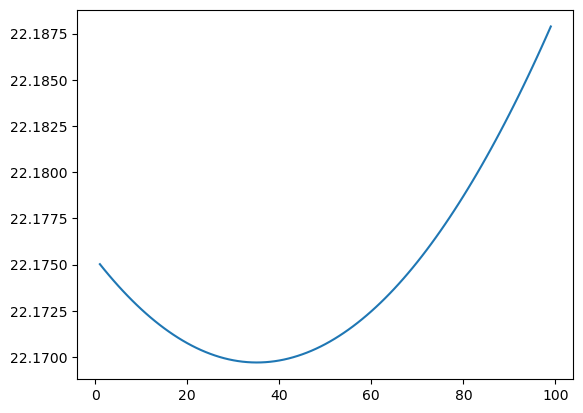

In [148]:
# 최소 mae 찾기
y_range = []
x_range = range(1, 100)
for i in x_range:
    y_range.append(get_mae(new + i * 0.01))
plt.plot(x_range, y_range)

In [156]:
get_mae(new + (np.argmin(y_range) + 1) * 0.01)

22.1697072703371

In [158]:
last = new + (np.argmin(y_range) + 1) * 0.01

In [159]:
submission_res = pd.DataFrame(last)
submission_res.to_csv('submission.csv')